In [ ]:
import numpy as np
!pip install qiskit
!pip install pylatexenc
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import pi, sqrt

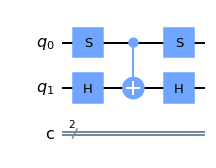

In [16]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
oracle_circuit = QuantumCircuit(qreg_q, creg_c)



def oracle(circuit,qreg_0,qreg_1):
    circuit.s(qreg_0)
    circuit.h(qreg_1)
    circuit.cx(qreg_0, qreg_1)
    circuit.s(qreg_0)
    circuit.h(qreg_1)
    return circuit
oracle(oracle_circuit,qreg_q[0],qreg_q[1])
display(oracle_circuit.draw('mpl'))

In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [ ]:
from qiskit import execute,assemble
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer,Aer
from qiskit_textbook.tools import array_to_latex
from IPython.display import Latex,Math


backend =Aer.get_backend('unitary_simulator')
job = execute(oracle_circuit, backend)
oracle_matrix=job.result().get_unitary(oracle_circuit,decimals=1)
oracle_matrix
array_to_latex(oracle_matrix, display_output= True)


<IPython.core.display.Math object>

In [ ]:
from qiskit import execute,assemble
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer,Aer

backend =Aer.get_backend('unitary_simulator')
job = execute(oracle_circuit, backend)
oracle_matrix=job.result().get_unitary(oracle_circuit,decimals=1)

from qiskit.visualization import array_to_latex
array_to_latex(oracle_matrix, precision=3, prefix='Oracle=',source=False)


<IPython.core.display.Latex object>

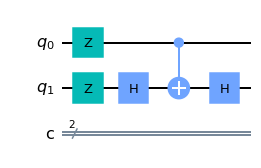

In [ ]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


circuit.z(qreg_q[0])
circuit.z(qreg_q[1])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[1])
display(circuit.draw('mpl'))

In [ ]:
from qiskit import execute,assemble
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer,Aer

backend =Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
rot_matrix=job.result().get_unitary(circuit,decimals=1)

from qiskit.visualization import array_to_latex
array_to_latex(rot_matrix, precision=3, prefix='REFLECTION=',source=False)

<IPython.core.display.Latex object>

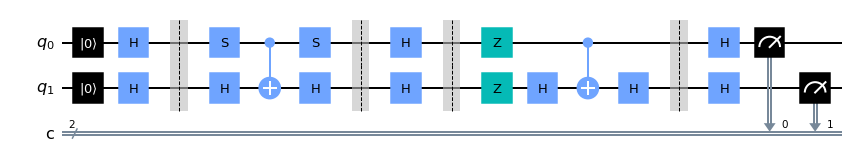


Total counts are: {'01': 1000}


In [ ]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
grover_circuit = QuantumCircuit(qreg_q, creg_c)

grover_circuit.reset(qreg_q[0])
grover_circuit.reset(qreg_q[1])

grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.barrier(qreg_q[0],qreg_q[1])

grover_circuit.s(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.cx(qreg_q[0], qreg_q[1])
grover_circuit.s(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.barrier(qreg_q[0],qreg_q[1])

grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.barrier(qreg_q[0],qreg_q[1])


grover_circuit.z(qreg_q[0])
grover_circuit.z(qreg_q[1])
grover_circuit.h(qreg_q[1])
grover_circuit.cx(qreg_q[0], qreg_q[1])
grover_circuit.h(qreg_q[1])
grover_circuit.barrier(qreg_q[0],qreg_q[1])

grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])

grover_circuit.measure(qreg_q[0], creg_c[0])
grover_circuit.measure(qreg_q[1], creg_c[1])
display(grover_circuit.draw('mpl'))

simulator = QasmSimulator()
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(grover_circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(grover_circuit)
print("\nTotal counts are:",counts)

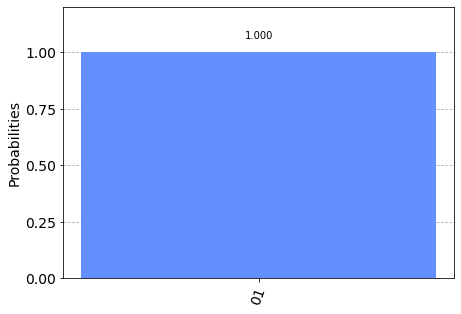

In [ ]:
plot_histogram(counts)

In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [ ]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

In [ ]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)


<IPython.core.display.Math object>

In [ ]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(oracle_circuit)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>